/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/transit-0.3.0-py3.5-linux-x86_64.egg/transit/transit.py:516: RuntimeWarning: divide by zero encountered in log
  params[-3] = np.log(self.central.q1)-np.log(1.0-self.central.q1)
/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/transit-0.3.0-py3.5-linux-x86_64.egg/transit/transit.py:517: RuntimeWarning: divide by zero encountered in log
  params[-2] = np.log(self.central.q2)-np.log(1.0-self.central.q2)


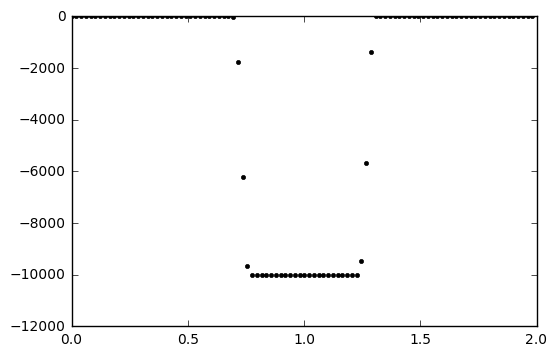

In [16]:
import transit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Build the transiting system.
s = transit.System(transit.Central(q1=0, q2=0))
body = transit.Body(radius=0.1, period=365.25, t0=1, b=0, e=0)
s.add_body(body)

# Compute the light curve integrated over a Kepler long cadence
# exposure time.
exp_time_minutes = 29.423259
exp_time_days = exp_time_minutes/(24.*60)

t = np.arange(0, 2, exp_time_days)
f = s.light_curve(t, texp=exp_time_days)

# Plot the results
plt.plot(t, (f-1) * 1e6, ".k")

In [6]:
1626.0 / 86400.0 * 60

1.1291666666666667

In [8]:
30/24.

1.25

In [13]:
body.duration

0.59453422164144765

Fine. So this produces a reasonable enough thing, but the point is that it's still trying too hard to be physical.

Mandel & Agol is NOT a box-car model. The box-car model ignores ingress & egress (which a finite-size transit does not).

It makes more sense to just define your own box car model, and for "supersampling" follow the batman example of what's happening over "ingress" and "egress" for the box-car model.

```
To do this, initialize a model with the supersample_factor and exp_time parameters specified:

m = batman.TransitModel(params, t, supersample_factor = 7, exp_time = 0.001)
This example will return the average value of the light curve calculated from 7 evenly spaced samples over the duration of each 0.001-day exposure. The exp_time parameter must have the same units as the array of observation times t.
```